In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

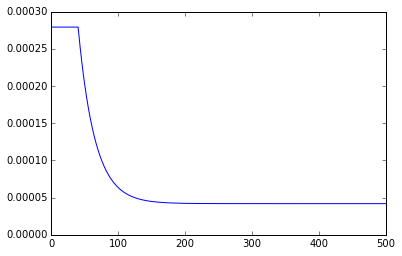

In [6]:

class LearningRate(object):

    def __init__(self, init, final, iters_at_init, falloff):
        assert final < init
        assert falloff > 0.0
        self.init = init
        self.iters_at_init = iters_at_init
        self.final = final
        self.falloff = falloff
        self.current = init

    def get_lr(self, epoch):
        if epoch < self.iters_at_init:
            return self.init
        else:
            diminuation = np.exp(-self.falloff *(epoch - self.iters_at_init))
            return (self.init - self.final) * diminuation + self.final


init = 0.0002791786739
final = init * 0.15
iters_at_init = 40
falloff = 0.04

lr = LearningRate(init, final, iters_at_init, falloff)
lrs = [lr.get_lr(epoch) for epoch in range(500)]
plt.plot(range(500), lrs)

In [4]:
t = AdjustVariable('learning_rate')

In [5]:
class fake_nn(object):
    def __init__(self):
        self.max_epochs = 100
        self.learning_rate = 0.0004

nn = fake_nn()
print t(nn, 10)

AttributeError: 'float' object has no attribute 'set_value'

(0, 0.000375)

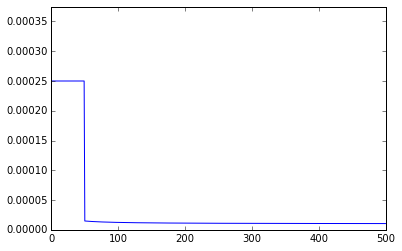

In [18]:
init_learning_rate = 0.00025
iters_at_init_lr = 50
tend_towards_lr = 0.0001
falloff = 0.02
max_epochs = 500

l_rates = []
for epoch in range(max_epochs):
    if epoch < iters_at_init_lr:
        lr = init_learning_rate
    else:
        lr = (init_learning_rate - tend_towards_lr) * \
            np.exp(-falloff *(epoch - iters_at_init_lr)) + tend_towards_lr
    l_rates.append(lr)
    
plt.plot(l_rates)
plt.ylim(0, init_learning_rate*1.5)

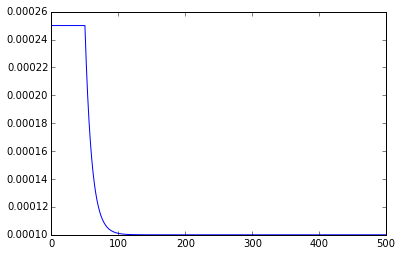

In [10]:
class LearningRate(object):

    def __init__(self, init, final, iters_at_init, falloff):
        assert final < init
        assert falloff > 0.0
        self.init = init
        self.iters_at_init = iters_at_init
        self.final = final
        self.falloff = falloff
        self.current = init

    def get_lr(self, epoch):
        if epoch < self.iters_at_init:
            return self.init
        else:
            diminuation = np.exp(-self.falloff *(epoch - self.iters_at_init))
            return (self.init - self.final) * diminuation + self.final


lr = LearningRate(0.00025, 0.0001, 50, 0.1)
lrs = [lr.get_lr(ii) for ii in range(500)]

plt.plot(lrs)

In [13]:
from hyperopt import hp
space = (
    hp.uniform( 'initial_learning_rate',  0.01,  0.1),
    hp.uniform( 'final_learning_rate_fraction', 0.01, 0.1),
    hp.quniform( 'epochs_of_initial', 25, 125, 5),
    hp.uniform( 'falloff', 0.01, 0.2),
    hp.uniform( 'input_dropout', 0.0, 0.5),
    hp.choice( 'filter_sizes', [3, 4, 5]),
    hp.quniform( 'num_filters', 32, 128, 1),
    hp.choice( 'num_filter_layers', [1, 2, 3]),
    hp.choice( 'pool_size_x', [2, 3, 4, 5, 6]),
    hp.choice( 'pool_size_y', [2, 3, 4, 5, 6]),
    hp.uniform( 'dense_dropout', 0.2, 0.8),
    hp.choice( 'num_dense_layers', [2, 3, 4]),
    hp.quniform( 'num_dense_units', 500, 1000, 1),
    hp.choice( 'inital_filter_layer', [False, True]),
    hp.choice( 'augment_flip', [False, True]),
    hp.choice( 'augment_roll', [False, True]),
    hp.choice( 'augment_vol_ramp', [False, True])
)


In [24]:
for s in space:
    print s.

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
